In [2]:
import pickle
import sys, os
sys.path.insert(1, os.path.join(sys.path[0], ".."))
from modt.modt import MoDT
from modt._initialization import *
from modt.visualization import *
from modt.utility import *

import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['font.size'] = 12

COLOR = 'black'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR

In [3]:
#data_input = pickle.load(open("../datasets/generated6_input.np", "rb"))
#data_target = pickle.load(open("../datasets/generated6_target.np", "rb"))
#data_input = pickle.load(open("../datasets/iris_input.pd", "rb"))
#data_target = pickle.load(open("../datasets/iris_target.pd", "rb"))
#data_input = pickle.load(open("../datasets/breast_cancer_input.np", "rb"))
#data_target = pickle.load(open("../datasets/breast_cancer_target.np", "rb"))
#data_input = pickle.load(open("../datasets/bank_input.pd", "rb"))  # Pd & Categoric features
#data_target = pickle.load(open("../datasets/bank_target.pd", "rb"))
#data_input = pickle.load(open("../datasets/banknote_input.pd", "rb"))  # Pd & numeric features
#data_target = pickle.load(open("../datasets/banknote_target.pd", "rb"))
#data_input = pickle.load(open("../datasets/cars_input.pd", "rb"))
#data_target = pickle.load(open("../datasets/cars_target.pd", "rb"))
#data_input = pickle.load(open("../datasets/students_input.pd", "rb"))
#data_target = pickle.load(open("../datasets/students_target.pd", "rb"))
data_input = pickle.load(open("../datasets/generated6_input.np", "rb"))
data_target = pickle.load(open("../datasets/generated6_target.np", "rb"))
parameters = {
    "X": data_input,
    "y": data_target,
    "n_experts": 3,
    "iterations": 100,
    "max_depth": 1,
    "init_learning_rate": 60,
    "learning_rate_decay": 0.995,
    "initialization_method": Kmeans_init(),
    "feature_names": None,
    "class_names": None,
    "use_2_dim_gate_based_on": None,
    "use_2_dim_clustering": False,
    "black_box_algorithm": None,
    "save_likelihood": True,
    }

parameters_fit = {
    "optimization_method": "least_squares_linear_regression",
    "early_stopping": False,
    "use_posterior": False,
    }

modt = MoDT(**parameters)
modt.fit(**parameters_fit)

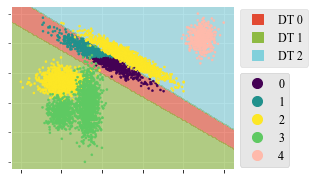

In [4]:
fig = plt.gcf()
fig.set_size_inches(4, 3)
plot_gating(modt,iteration=modt.best_iteration,title=False,axis_digits=False,inverse_transform_standardization=False,legend=True,legend_classes=True,rasterize=True)
#plt.savefig("output/example_gate1.pdf", bbox_inches="tight", dpi=300)

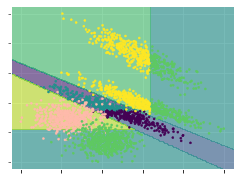

In [120]:
fig = plt.gcf()
#fig.set_size_inches(5, 3.5)
fig.set_size_inches(4, 3)
visualize_decision_area(modt)
#plt.savefig("output/example_decision_area_small.pdf", bbox_inches="tight", dpi=300)

Accuracy disjoint DTs: 0.964
Min:  0.8812 Max:  0.9628


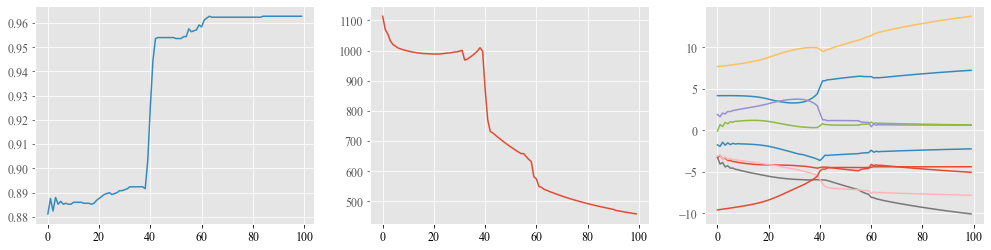

In [68]:
print("Accuracy disjoint DTs:", modt.score_internal_disjoint())
fig = plt.gcf()
fig.set_size_inches(17,4)
plot_training(modt)

In [69]:
for depth in [1,2,3,4]:
    print("Depth: {} accuracy: {}".format(depth, tree_accuracy(modt.X,modt.y,depth)))

Depth: 1 accuracy: 0.5172
Depth: 2 accuracy: 0.7332
Depth: 3 accuracy: 0.8076
Depth: 4 accuracy: 0.8868


In [70]:
#fig = plt.gcf()
#fig.set_size_inches(5.8, 1.2)
#accuracy_line(modt)
#plt.savefig("output/accuracy.pdf", bbox_inches="tight")
#theta_development(modt)
#plt.savefig("output/theta.pdf", bbox_inches="tight")

In [71]:
#fig = plt.gcf()
#fig.set_size_inches(5.8, 1.2)
#plt.plot(modt.all_likelihood)
#plt.savefig("output/loss.pdf", bbox_inches="tight")

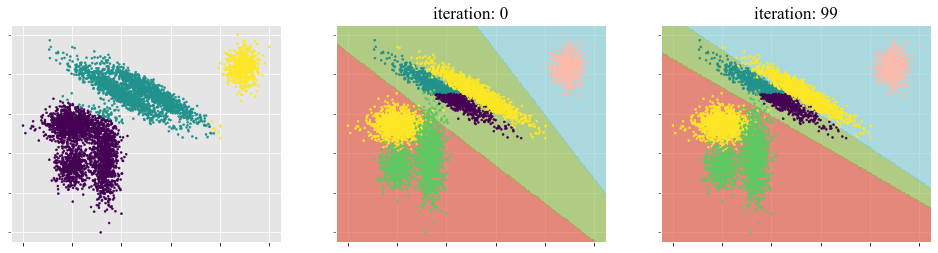

In [8]:
fig = plt.gcf()
fig.set_size_inches(16.5, 4)
plt.subplot(1, 3, 1)
plot_initialization(modt)
plt.subplot(1, 3, 2)
#visualize_gating(modt,iteration=0, axis_ticks=True)
plot_gating(modt,iteration=0,title=True,axis_digits=False,inverse_transform_standardization=False)
plt.subplot(1, 3, 3)
plot_gating(modt,iteration=modt.completed_iterations,title=True,axis_digits=False,inverse_transform_standardization=False)

In [9]:
modt.best_iteration

48

In [10]:
modt.all_DTs[48]

[DecisionTreeClassifier(max_depth=2),
 DecisionTreeClassifier(max_depth=2),
 DecisionTreeClassifier(max_depth=2)]

In [11]:
DTs = modt.all_DTs[modt.best_iteration]

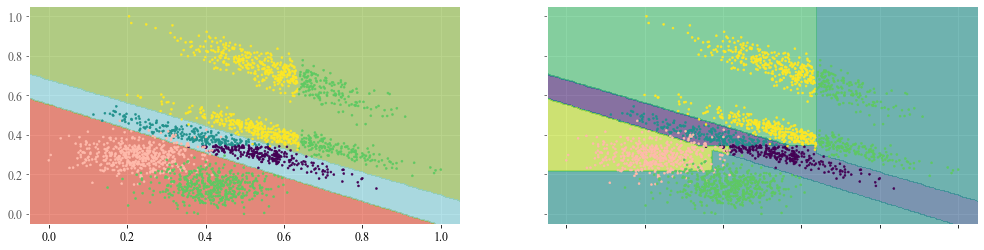

In [106]:
if parameters["X"].shape[1] == 2:
    fig = plt.gcf()
    fig.set_size_inches(17, 4)
    plt.subplot(1, 2, 1)
    plot_gating(modt,iteration=modt.best_iteration,title=False,axis_digits=True,inverse_transform_standardization=False)
    plt.subplot(1, 2, 2)
    visualize_decision_area(modt)

In [13]:
visualize_decision_area_old(modt.predict, modt.X_original, modt.y, enable_scatter=True, axis_digits=True)

NameError: name 'visualize_decision_area_old' is not defined

In [ ]:
tree.plot_tree(modt.DT_experts_disjoint[0])

In [ ]:
for expert in range(0,modt.n_experts):
    plot_disjoint_dt(modt,expert=expert,size=(17,5))

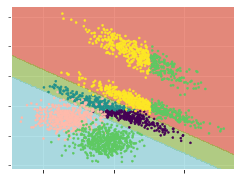

In [41]:
from celluloid import Camera # Codex needed on windows: https://ffmpeg.org/download.html
from IPython.display import HTML
fig = plt.figure(figsize=(4,3))

camera = Camera(fig)
for i in range(0,parameters["iterations"]): 
    plot_gating(modt,iteration=i,title=False,axis_digits=False,inverse_transform_standardization=False)
    #visualize_gating_animation(fig,modt.get_expert_iteration,modt.X,modt.y,i,low_alpha=False)
    camera.snap()
animation = camera.animate()

HTML(animation.to_html5_video())

In [121]:
modt.train_disjoint_trees(modt.best_iteration, tree_algorithm="sklearn_asymmetric")

In [124]:
plot_dt_dtreeviz(modt,2,colors="visible", asymmetric=True, fancy=False)